# Celeb-DF

Max Probability: 19.74%
Average Probability: 10.88%
Count for Probability over 40%: 0
Variance of Histogram: 0.0003433623060118407


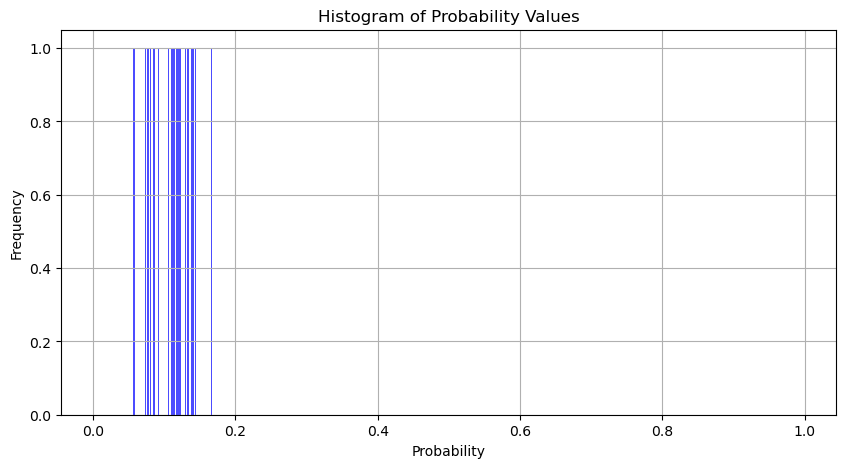

In [3]:
# 2.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "1.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('1_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.4 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.4)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 40%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

colors = ['blue' if p <= 0.4 else 'red' for p in probability_sum]

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color=colors, alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Max Probability: 11.30%
Average Probability: 9.98%
Count for Probability over 60%: 0
Variance of Histogram: 2.8338445190456696e-05


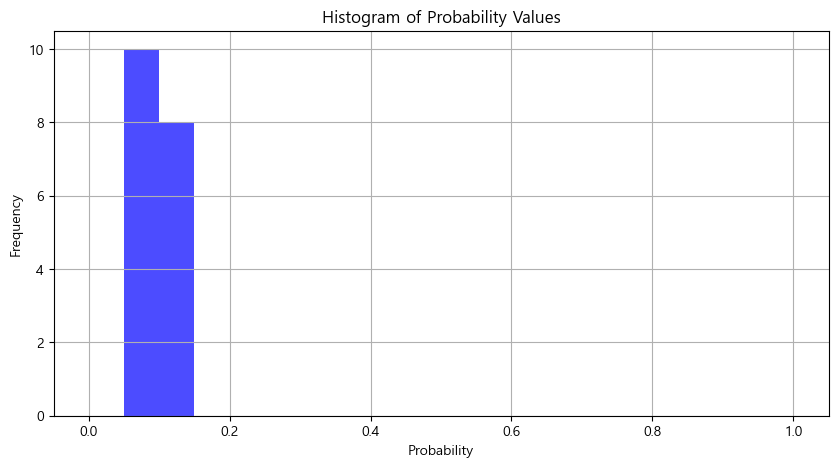

In [14]:
# 104.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "Celeb-DF/real/104.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('Celeb-DF/real/104_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')


# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Max Probability: 65.43%
Average Probability: 15.86%
Count for Probability over 60%: 1
Variance of Histogram: 0.011184940114617348


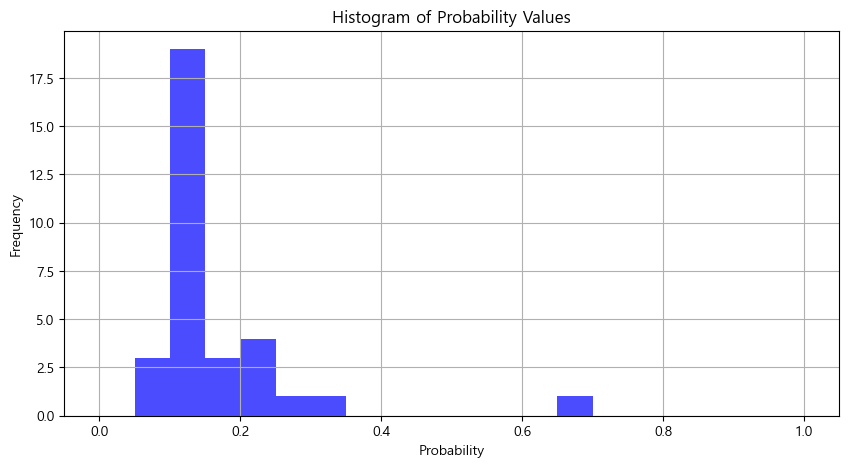

In [15]:
# 312.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "Celeb-DF/real/312.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('Celeb-DF/real/312_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# FaceForensic++

Max Probability: 28.18%
Average Probability: 10.96%
Count for Probability over 60%: 0
Variance of Histogram: 0.0014298891182988882


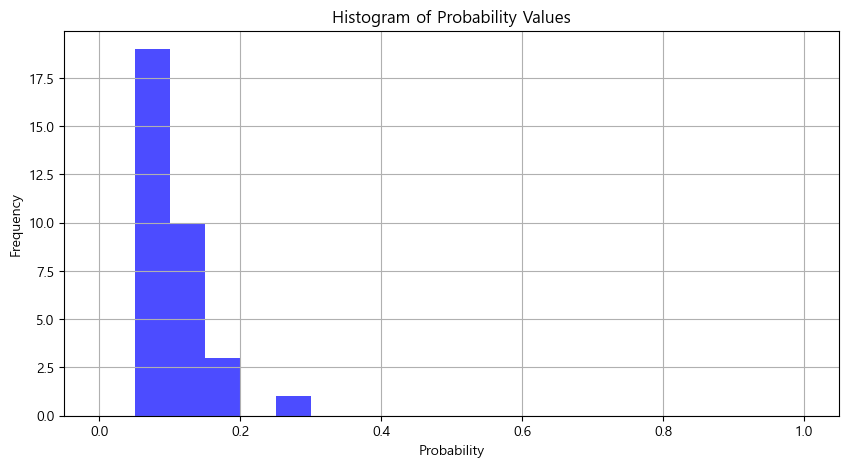

In [16]:
# 1.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "FaceForensic++/real/1.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('FaceForensic++/real/1_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Max Probability: 43.32%
Average Probability: 13.86%
Count for Probability over 60%: 0
Variance of Histogram: 0.00465404661372304


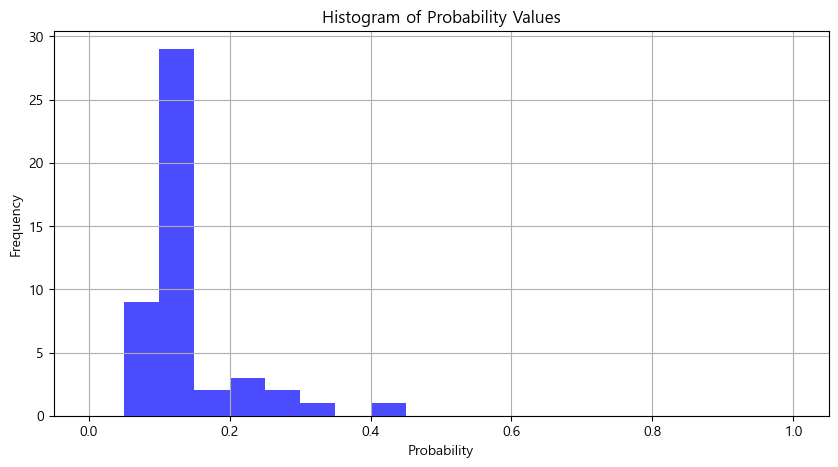

In [17]:
# 2.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "FaceForensic++/real/2.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('FaceForensic++/real/2_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Max Probability: 19.20%
Average Probability: 10.40%
Count for Probability over 60%: 0
Variance of Histogram: 0.0003224858664907515


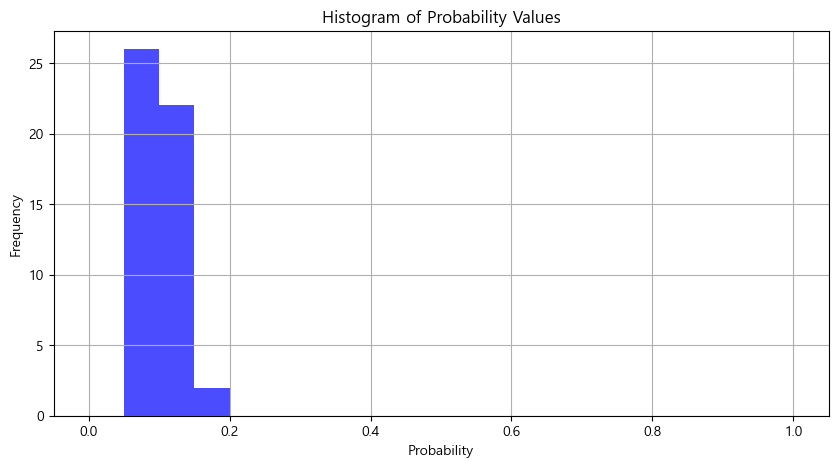

In [18]:
# 3.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "FaceForensic++/real/3.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('FaceForensic++/real/3_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Max Probability: 17.11%
Average Probability: 10.89%
Count for Probability over 60%: 0


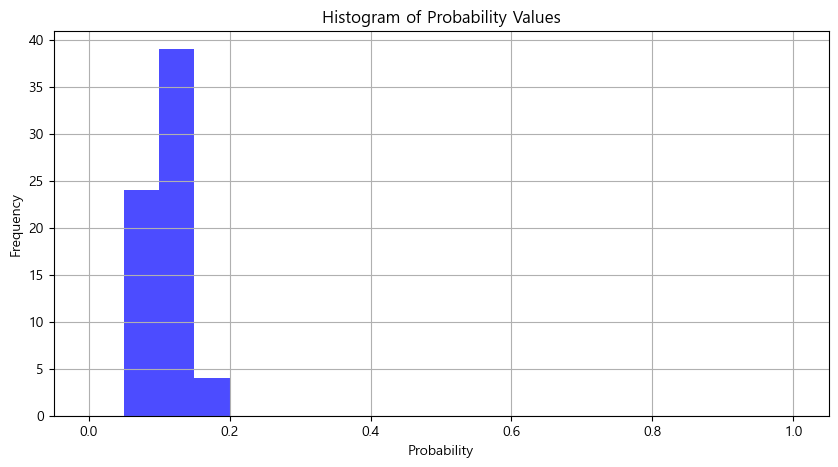

In [11]:
# 4.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "FaceForensic++/real/4.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('FaceForensic++/real/4_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
np.var(probability_sum)

0.00031704284

# DFDC

Max Probability: 14.86%
Average Probability: 10.47%
Count for Probability over 60%: 0
Variance of Histogram: 0.0001423033099854365


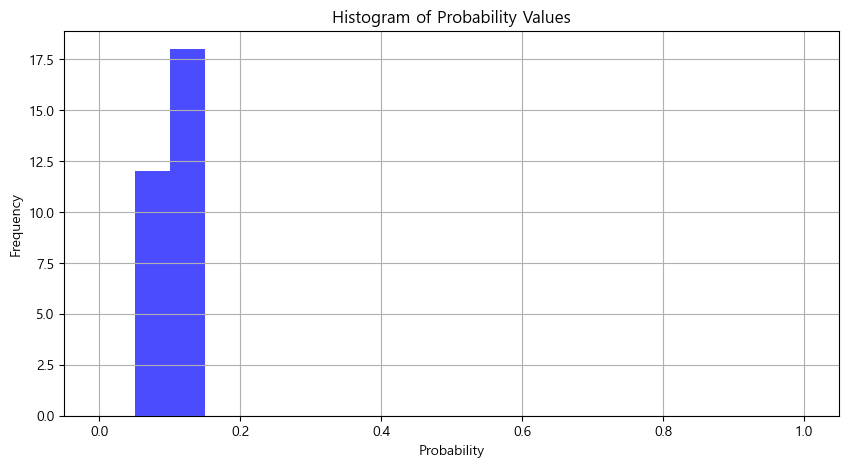

In [19]:
# 1.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "DFDC/real/1.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('DFDC/real/1_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Max Probability: 13.15%
Average Probability: 9.51%
Count for Probability over 60%: 0
Variance of Histogram: 0.0001981480891117826


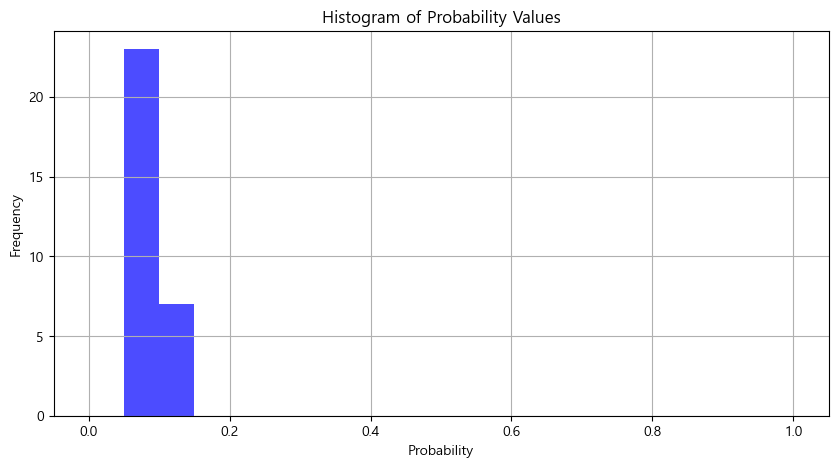

In [20]:
# 2.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "DFDC/real/2.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('DFDC/real/2_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Max Probability: 30.44%
Average Probability: 15.18%
Count for Probability over 60%: 0
Variance of Histogram: 0.002697514370083809


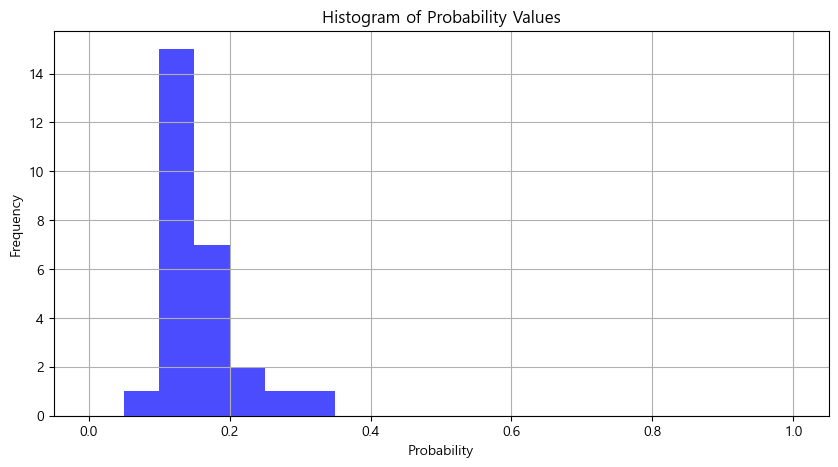

In [21]:
# 3.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "DFDC/real/3.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('DFDC/real/3_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# KoDF

Max Probability: 13.29%
Average Probability: 8.98%
Count for Probability over 60%: 0
Variance of Histogram: 5.6597054935991764e-05


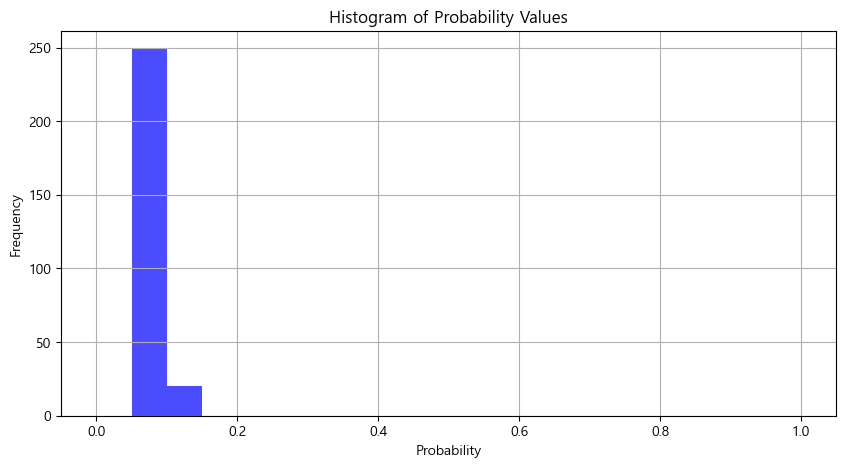

In [24]:
# 1.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "KoDF/real/1.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('KoDF/real/1_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Max Probability: 11.25%
Average Probability: 8.43%
Count for Probability over 60%: 0
Variance of Histogram: 5.98396836721804e-05


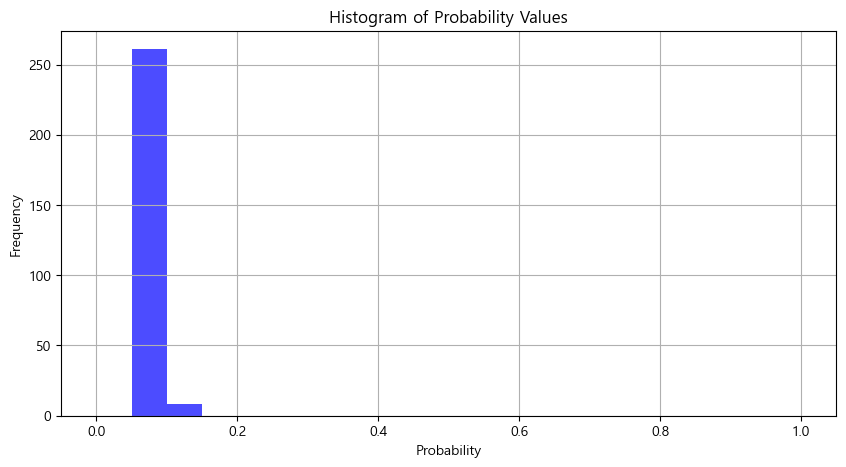

In [25]:
# 1.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "KoDF/real/2.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('KoDF/real/2_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Max Probability: 38.26%
Average Probability: 20.90%
Count for Probability over 60%: 0
Variance of Histogram: 0.004065969027578831


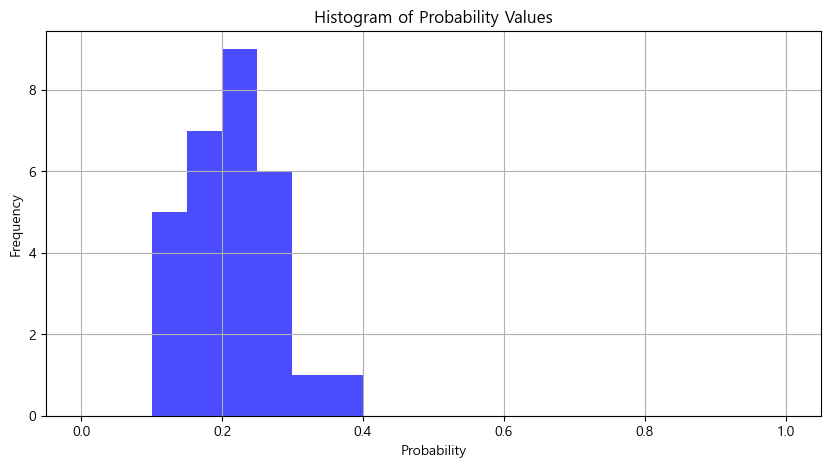

In [27]:
# 1.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "우성2.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('우성2_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Max Probability: 77.67%
Average Probability: 29.03%
Count for Probability over 60%: 1
Variance of Histogram: 0.028971267864108086


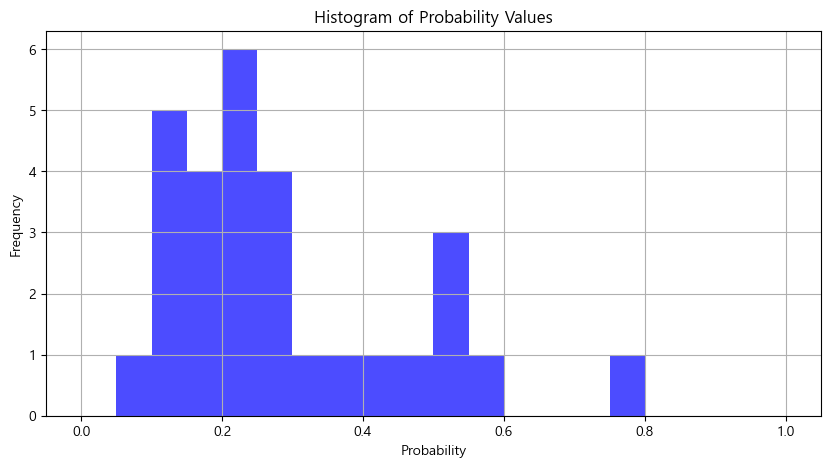

In [29]:
# 1.mp4
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
import os
import dlib
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

# 동영상 파일 경로
video_path = "우성3.mp4"

# 동영상 파일을 읽기 모드로 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 너비와 높이 가져오기
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 결과 동영상 저장을 위한 VideoWriter 초기화
out = cv2.VideoWriter('우성3_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# 모델 로드
model = load_model("model_checkpoint_v2.h5")

# 얼굴 탐지기 초기화
face_detector = dlib.get_frontal_face_detector()

frame_counter = 0  # 현재 프레임 카운터
frame_num = 0
probability = 0.0  # 초기 확률 값
probability_sum = []

while True:
    # 동영상에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    frame_counter += 1

    # 얼굴 탐지
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray)
    
    if len(faces) > 0:            
        for face in faces:
            left, top, right, bottom = face.left(), face.top(), face.right(), face.bottom()
            margin = int((right - left) * 0.3)
            left -= margin
            top -= margin
            right += margin
            bottom += margin
            face_img = frame[top:bottom, left:right]
            face_img = cv2.resize(face_img, (380, 380))

                # 모델 입력 준비
            input_data = tf.convert_to_tensor(face_img, dtype=tf.float32)
            input_data = tf.image.resize(input_data, (380, 380))
            input_data = tf.expand_dims(input_data, axis=0)
        if frame_counter % 10 == 0:
            # 모델로 예측 수행
            predictions = model(input_data)
            probability = predictions[0][0]
            probability_sum.append(probability)
            
        # 결과 텍스트와 네모 박스 그리기
        color = (0, 0, 255) if probability > 0.6 else (255, 0, 0)
        text = f'Probability: {probability * 100:.2f}%'
        cv2.rectangle(frame, (left, top), (right, bottom), color, 2)
        cv2.putText(frame, text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    
    # 결과 동영상에 현재 프레임 추가
    out.write(frame)

# 동영상 처리 종료
cap.release()
out.release()
cv2.destroyAllWindows()
average_probability = np.mean(probability_sum)
max_probability = max(probability_sum)
count = sum(1 for p in probability_sum if p > 0.6)
   
print(f'Max Probability: {max_probability * 100:.2f}%')
print(f'Average Probability: {average_probability * 100:.2f}%')
print(f'Count for Probability over 60%: {count}')
print(f'Variance of Histogram: {np.var(probability_sum)}')

# Plot histogram of probability values
plt.figure(figsize=(10, 5))
plt.hist(probability_sum, bins=20,range=(0, 1.0) , color='blue', alpha=0.7)
plt.title('Histogram of Probability Values')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()